# Telemetry

## Import libraries

In [1]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
from general_utils import *

In [2]:
# Load a specific race session
session = fastf1.get_session(2024, 'Brazil', 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (3.58 GB) /home/michail/.cache/fastf1


core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '31', '10', '63', '16'

In [3]:
sub_telem_df = session.laps.pick_drivers('VER').pick_laps(10).get_telemetry()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [4]:
sub_telem_df.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

## Comparison between drivers for specific lap

**Available attributes**

['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z']

events      WARNING 	Correcting user input 'Brazilian Grand Prix' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_mess

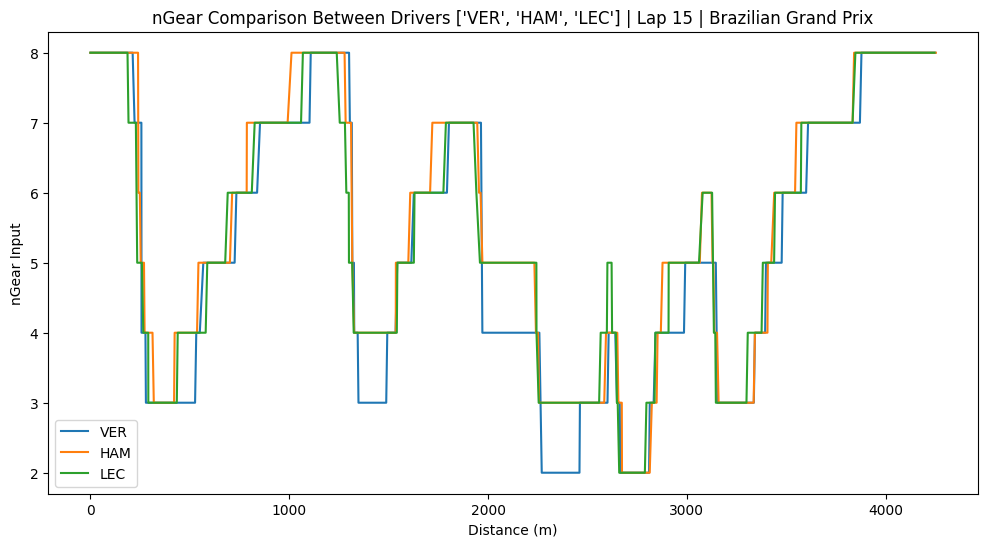

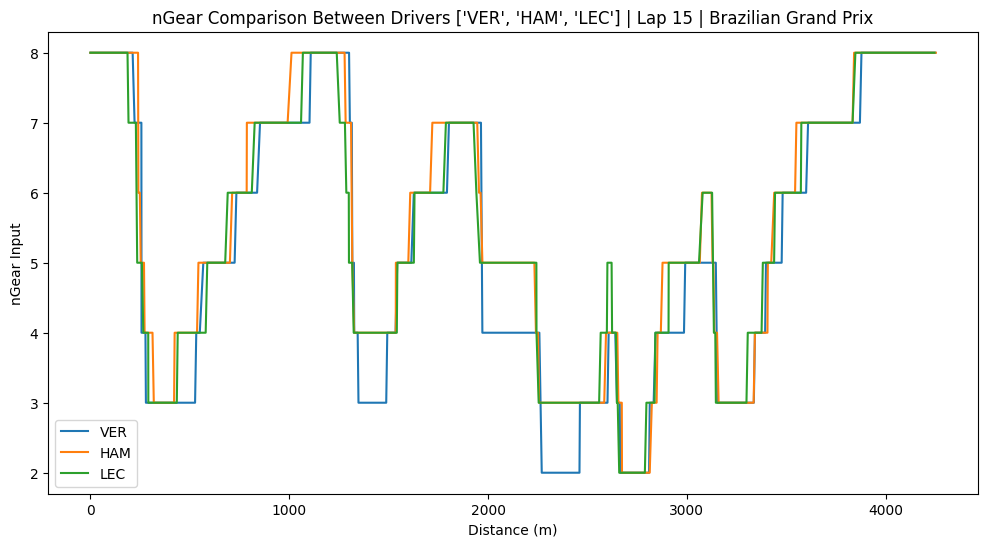

In [5]:
compare_metric(year=2024, event='Brazilian Grand Prix', session_type='R', drivers_abbrs=['VER', 'HAM', 'LEC'], metric='nGear', lap=15)

events      WARNING 	Correcting user input 'Brazilian Grand Prix' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_mess

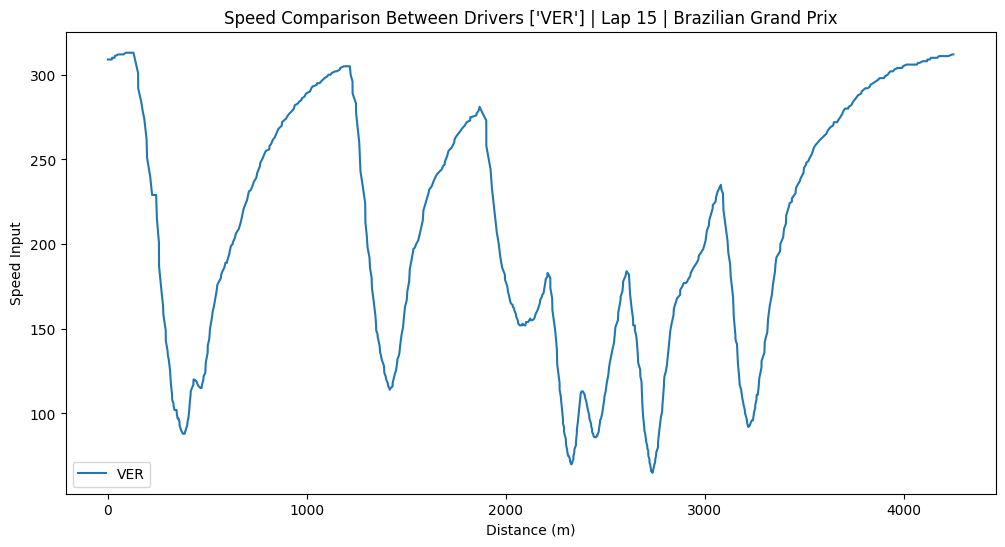

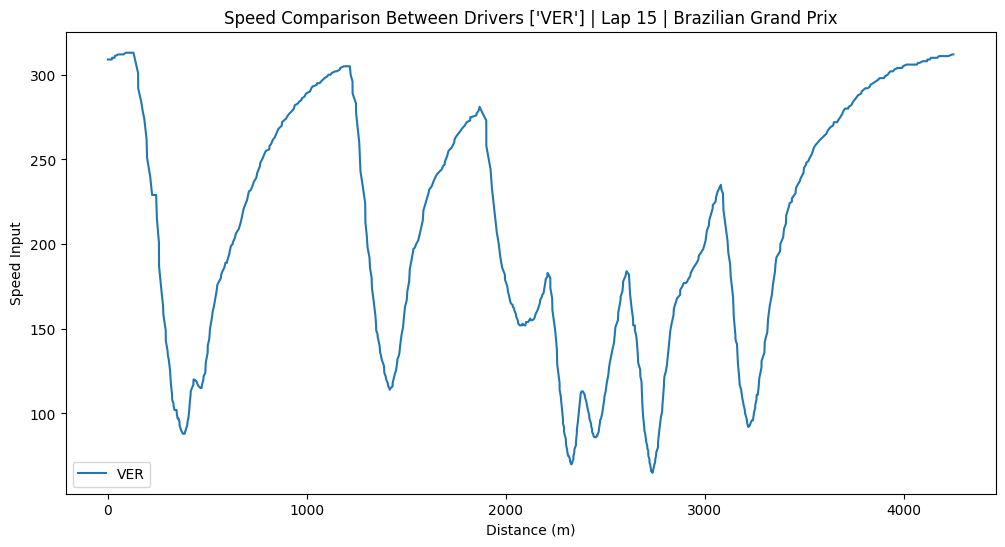

In [6]:
compare_metric(year=2024, event='Brazilian Grand Prix', session_type='R', drivers_abbrs=['VER'], metric='Speed', lap=15)

## Who had the smallest reaction time to 200km/h?, Who had the fastest reaction time at the start?

Maybe also have the top five drivers reaction times

In [58]:
year = 2024
event = 'Spanish Grand Prix'

session = fastf1.get_session(year, event, 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/10/results.json failed; using cached response
Traceback (most recent call last):
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/site-packages/urllib3/connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/site-packages/urllib3/connection.py", line 507, in getresponse
    httplib_response = super().getresponse()
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/http/client.py", line 1428, in getresponse
    response.begin()
    ~~~~~~~~~~~~~~^^
  File "/home/michail/miniconda3/envs/f1_assistant/lib/python3.13/http/client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ~~~~~~~~~~~~

In [59]:
driver_reaction_df = session.laps.pick_drivers('VER').pick_laps(1).get_telemetry()

In [60]:
driver_reaction_df.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-06-23 13:03:14.413,0 days 00:56:57.095000,,0.556111,0 days 00:00:00,10159,0,1,18,True,1,interpolation,0.015908,0.000004,OnTrack,871,-1045,1708
3,2024-06-23 13:03:14.415,0 days 00:56:57.097000,,0.556111,0 days 00:00:00.002000,10125,0,1,18,True,1,pos,0.015967,0.000004,OnTrack,872,-1045,1708
4,2024-06-23 13:03:14.547,0 days 00:56:57.229000,,0.556111,0 days 00:00:00.134000,10057,0,1,18,True,1,car,0.000000,0.000000,OnTrack,872,-1044,1707
5,2024-06-23 13:03:14.576,0 days 00:56:57.258000,,0.556111,0 days 00:00:00.163000,9506,0,1,18,True,1,pos,-0.008737,-0.000002,OnTrack,872,-1045,1708
6,2024-06-23 13:03:14.867,0 days 00:56:57.549000,3,0.556111,0 days 00:00:00.454000,8955,0,1,18,False,1,car,0.000000,0.000000,OnTrack,871,-1045,1708


In [61]:
driver_reaction_df.info()

<class 'fastf1.core.Telemetry'>
Index: 633 entries, 2 to 634
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   633 non-null    datetime64[ns] 
 1   SessionTime            633 non-null    timedelta64[ns]
 2   DriverAhead            633 non-null    object         
 3   DistanceToDriverAhead  633 non-null    float64        
 4   Time                   633 non-null    timedelta64[ns]
 5   RPM                    633 non-null    int64          
 6   Speed                  633 non-null    int64          
 7   nGear                  633 non-null    int64          
 8   Throttle               633 non-null    int64          
 9   Brake                  633 non-null    bool           
 10  DRS                    633 non-null    int64          
 11  Source                 633 non-null    object         
 12  Distance               633 non-null    float64        
 13  R

In [62]:
driver_reaction_df = driver_reaction_df[['Time', 'Speed']]

In [63]:
driver_reaction_df[driver_reaction_df['Speed'] > 99].iloc[0]['Time']

Timedelta('0 days 00:00:02.974000')

In [64]:
td = driver_reaction_df[driver_reaction_df['Speed'] > 199].iloc[0]['Time']

In [71]:
# Convert to seconds and milliseconds
seconds = int(td.total_seconds())  # Whole seconds
milliseconds = int(td.microseconds / 1000)  # Convert microseconds to milliseconds

# Combine into desired format
raw_reaction_time = float(f"{seconds}.{milliseconds:03d}")

In [72]:
raw_reaction_time

5.534

In [81]:
event = 'Spanish Grand Prix'
drivers_list = ['VER', 'PIA']
speed = 100

In [82]:
driver_reaction_dict = get_reaction_time(event, drivers_list, speed)
driver_reaction_dict

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']


{'VER': 2.974, 'PIA': 3.023}

In [80]:
pd.DataFrame(driver_reaction_dict.items(), columns=['Driver', 'ReactionTime'])


,Driver,ReactionTime
0,VER,2.974
1,PIA,3.023


In [ ]:
def get_reaction_time(event:str, drivers_list: list, speed: float):
    '''
        Get reaction time of drivers to reach a specific speed in the race start
    '''

    year = 2024

    session = fastf1.get_session(year, event, 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
    session.load()

    driver_reaction_dict = dict()

    for driver in drivers_list:

        driver_reaction_df = session.laps.pick_drivers(driver).pick_laps(1).get_telemetry()
        reaction_time = driver_reaction_df[driver_reaction_df['Speed'] > speed-1].iloc[0]['Time']

        # Convert to seconds and milliseconds
        seconds = int(reaction_time.total_seconds())  # Whole seconds
        milliseconds = int(reaction_time.microseconds / 1000)  # Convert microseconds to milliseconds

        # Combine into desired format
        raw_reaction_time = float(f"{seconds}.{milliseconds:03d}")

        # Save driver reaction time in dictionary
        driver_reaction_dict[driver] = raw_reaction_time

    reaction_df = pd.DataFrame(driver_reaction_dict.items(), columns=['Driver', 'ReactionTime'])
    reaction_df = reaction_df.sort_values('ReactionTime')

    sorted_drivers = reaction_df['Driver']
    sorted_reaction_times = reaction_df['ReactionTime']

    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(5, 3))

    # Generate the list of colors for the bars based on the DRIVER_COLORS mapping
    bar_colors = [DRIVER_COLORS[driver] for driver in sorted_drivers]

    # Plot the bar chart with the custom colors
    ax.bar(sorted_drivers, sorted_reaction_times, color=bar_colors)
    # Add labels and title
    ax.set_xlabel('Drivers')
    ax.set_ylabel('Reaction time')

    # Set the y-axis limits to focus on the range of reaction times
    min_reaction = min(sorted_reaction_times)
    max_reaction = max(sorted_reaction_times)

    # Add a small margin around the reaction times
    y_margin = (max_reaction - min_reaction) * 0.5  # 10% of the range

    # Apply the y-axis limits
    ax.set_ylim(min_reaction - y_margin, max_reaction + y_margin)

    ax.set_title('Reaction time of drivers')

    plt.show()

    # return driver_reaction_dict
    

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']


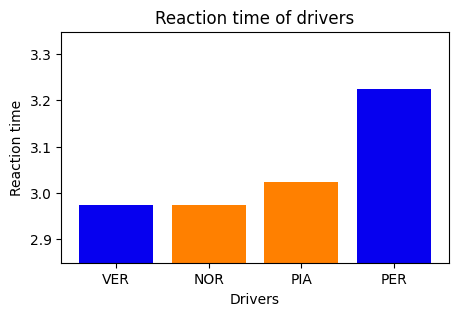

{'VER': 2.974, 'PER': 3.223, 'NOR': 2.974, 'PIA': 3.023}

In [122]:
drivers_list = ['VER', 'PER', 'NOR', 'PIA']
get_reaction_time(event, drivers_list, speed)